In [26]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
tf.logging.set_verbosity(tf.logging.INFO)

In [27]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [28]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [29]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [30]:
pred = tf.add(tf.multiply(X, W), b)

In [31]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.246496677 W= 0.479749 b= -0.854258
Epoch: 0100 cost= 0.226914421 W= 0.466061 b= -0.755784
Epoch: 0150 cost= 0.209593371 W= 0.453187 b= -0.663167
Epoch: 0200 cost= 0.194272339 W= 0.441078 b= -0.576058
Epoch: 0250 cost= 0.180720612 W= 0.429689 b= -0.49413
Epoch: 0300 cost= 0.168733940 W= 0.418978 b= -0.417075
Epoch: 0350 cost= 0.158131480 W= 0.408904 b= -0.344603
Epoch: 0400 cost= 0.148753628 W= 0.399429 b= -0.276441
Epoch: 0450 cost= 0.140458792 W= 0.390518 b= -0.212333
Epoch: 0500 cost= 0.133122042 W= 0.382136 b= -0.152037
Epoch: 0550 cost= 0.126632750 W= 0.374253 b= -0.0953278
Epoch: 0600 cost= 0.120893046 W= 0.366839 b= -0.0419912
Epoch: 0650 cost= 0.115816385 W= 0.359866 b= 0.00817319
Epoch: 0700 cost= 0.111326233 W= 0.353308 b= 0.0553541
Epoch: 0750 cost= 0.107354842 W= 0.347139 b= 0.099729
Epoch: 0800 cost= 0.103842326 W= 0.341338 b= 0.141465
Epoch: 0850 cost= 0.100735664 W= 0.335881 b= 0.180718
Epoch: 0900 cost= 0.097988017 W= 0.330749 b= 0.217637
Epoch: 0950 

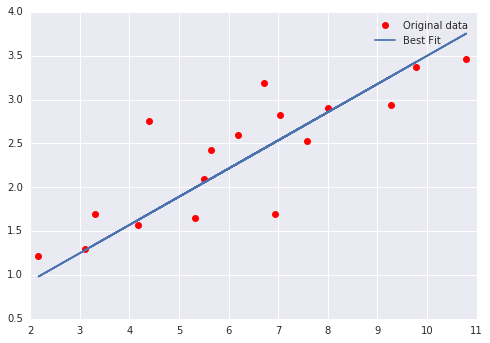

In [33]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Best Fit')
    plt.legend()
    plt.show()